<a href="https://colab.research.google.com/github/AndrewMarksArt/PythonDataScienceHandbook/blob/master/Intro_to_Scikit_Learn_5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


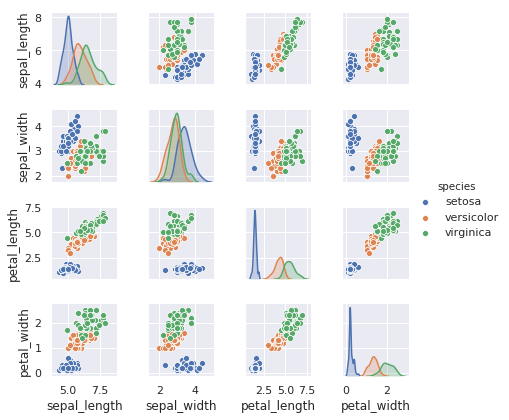

In [3]:
sns.pairplot(iris, hue='species', height=1.5)

In [4]:
x_iris = iris.drop('species', axis=1)
x_iris.shape

(150, 4)

In [5]:
y_iris = iris['species']
y_iris.shape

(150,)

### Simple Linear Regression


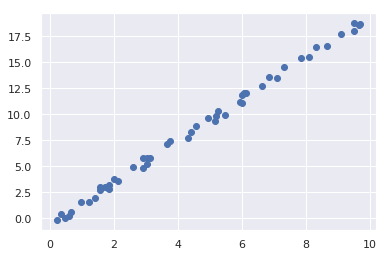

In [6]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.rand(50)
plt.scatter(x, y);

In [0]:
from sklearn.linear_model import LinearRegression

In [8]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
x.shape

(50,)

In [10]:
X = x[:, np.newaxis]
X.shape

(50, 1)

In [11]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
model.coef_

array([2.00660766])

In [13]:
model.intercept_

-0.5350275750800026

In [0]:
xfit = np.linspace(-1,11)

In [0]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

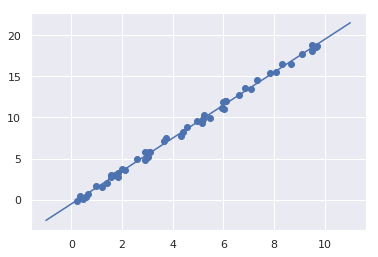

In [16]:
plt.scatter(x,y)
plt.plot(xfit, yfit);

### Supervised learning example: Iris classification


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
Xtrain, Xtest, ytrain, ytest = train_test_split(x_iris, y_iris, random_state=1)

In [0]:
from sklearn.naive_bayes import GaussianNB

In [0]:
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [0]:
from sklearn.metrics import accuracy_score

In [22]:
accuracy_score(ytest, y_model)

0.9736842105263158

### Unsupervised learning example: Iris dimensionality


In [0]:
from sklearn.decomposition import PCA
model = PCA(n_components=2)
model.fit(x_iris)
X_2D = model.transform(x_iris)

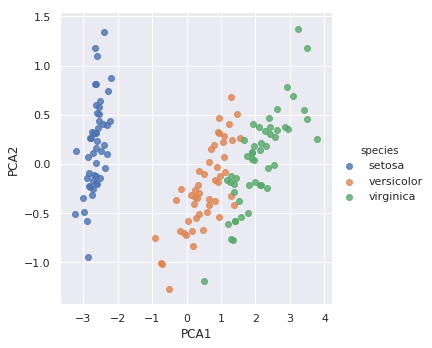

In [24]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot('PCA1', 'PCA2', hue='species', data=iris, fit_reg=False);

### Unsupervised learning: Iris Clustering


In [0]:
from sklearn.mixture import GaussianMixture as GMM

In [0]:
model = GMM(n_components=3, covariance_type='full')
model.fit(x_iris)
y_gmm = model.predict(x_iris)

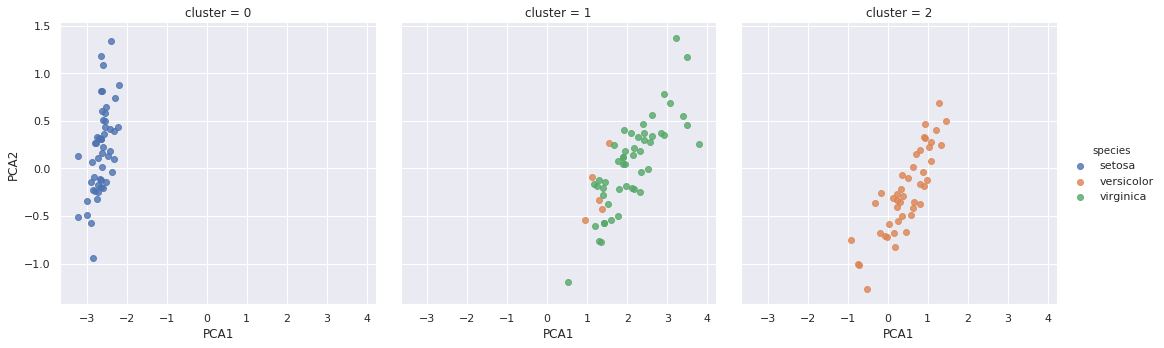

In [27]:
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2",  data=iris, hue='species', col='cluster', fit_reg=False);

In [28]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,PCA1,PCA2,cluster
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397,0
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001,0
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949,0
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299,0
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755,0


### Application: Exploring Hand-Written Digits


In [29]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

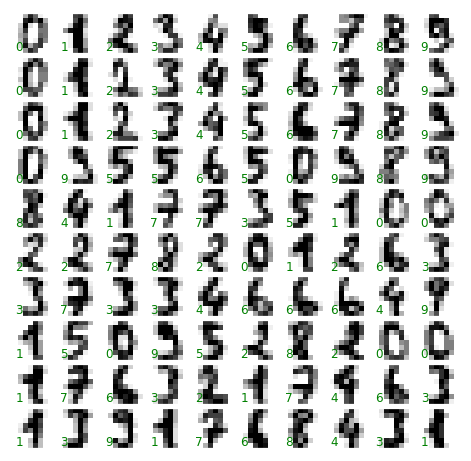

In [32]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots( 10, 10, figsize=(8,8),
                          subplot_kw={'xticks':[], 'yticks':[]},
                          gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
  ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
  ax.text(0.05, 0.05, str(digits.target[i]),
          transform=ax.transAxes, color='green')

In [33]:
X = digits.data
X.shape

(1797, 64)

In [34]:
y = digits.target
y.shape

(1797,)

### Unsupervised learning: Dimensionality reduction

In [0]:
from sklearn.manifold import Isomap

In [37]:
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

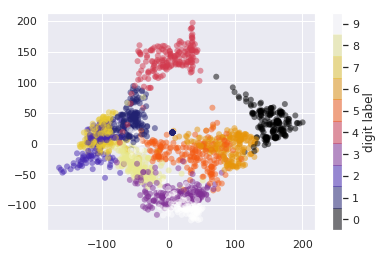

In [46]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('CMRmap', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

### Classification on digits

In [0]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [0]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [49]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

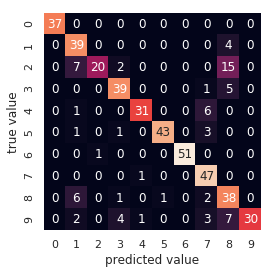

In [50]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

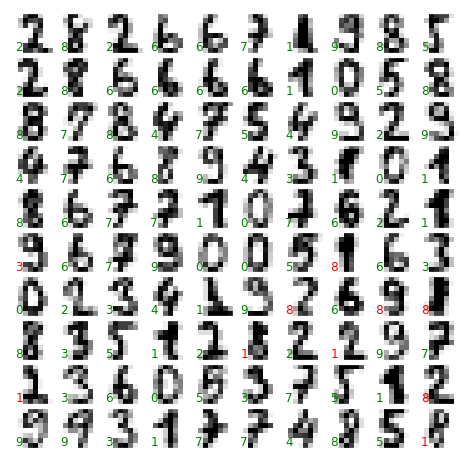

In [51]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')